# <h1> <font color="teal"> Importing Libraries : </font> </h1>

In [2]:
# Data
import numpy as np
import pandas as pd
from collections import defaultdict

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
#import missingno as msn
#from wordcloud import WordCloud
import plotly.express as px

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#from imblearn.under_sampling import RandomUnderSampler

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

# <h1> <font color="teal"> Dataset 1 : </font> </h1>

# <h1> <font color="teal"> Importing Datasets : </font> </h1>

In [3]:
data_revenue = pd.read_csv("NSE_data.csv")

In [4]:
data_revenue.head()

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,3-Jan-22,EGAD,Eaagads Ltd,10,15,13.5,13.8,13.5,13.5,-,-,"4,000",-
1,3-Jan-22,KUKZ,Kakuzi Plc,355,427,385,385,385,385,-,-,-,-
2,3-Jan-22,KAPC,Kapchorua Tea Kenya Plc,80,101,99.5,99.5,99.5,95.5,4,4.19%,100,-
3,3-Jan-22,LIMT,Limuru Tea Plc,260,360,320,320,320,320,-,-,-,-
4,3-Jan-22,SASN,Sasini Plc,16.75,22.6,18.7,18.7,18.7,18.7,-,-,-,-


# <h3> <font color="#A19104"> Getting only relevant variables in the data set : </font> </h3>

In [5]:
# Drop the columns that you don't want to include and assign the result to a new variable called selected_data
selected_data = data_revenue.drop(["Name", "Code", "Change%", "Adjusted Price"], axis=1)

In [6]:
selected_data.head()

,Date,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Volume
0,3-Jan-22,10,15,13.5,13.8,13.5,13.5,-,"4,000"
1,3-Jan-22,355,427,385,385,385,385,-,-
2,3-Jan-22,80,101,99.5,99.5,99.5,95.5,4,100
3,3-Jan-22,260,360,320,320,320,320,-,-
4,3-Jan-22,16.75,22.6,18.7,18.7,18.7,18.7,-,-


# <h1> <font color="teal"> Transformation : </font> </h1>

In [7]:
# Define a list of column names that you want to include
columns_to_include = ["12m Low", "12m High", "Day Low", "Day High", "Day Price", "Previous","Change", "Volume"]

# Loop over the column names and apply the same operations to each column
for column in columns_to_include:
  # Replace commas with empty strings
  selected_data[column] = selected_data[column].str.replace(",", "")
  # Replace dashes with np.nan
  selected_data[column] = selected_data[column].replace("-", np.nan)
  # Convert the values to numeric and handle errors
  selected_data[column] = pd.to_numeric(selected_data[column], errors="coerce")

In [8]:
selected_data.head()

,Date,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Volume
0,3-Jan-22,10.00,15.0,13.5,13.8,13.5,13.5,NaN,4000.0
1,3-Jan-22,355.00,427.0,385.0,385.0,385.0,385.0,NaN,NaN
2,3-Jan-22,80.00,101.0,99.5,99.5,99.5,95.5,4.0,100.0
3,3-Jan-22,260.00,360.0,320.0,320.0,320.0,320.0,NaN,NaN
4,3-Jan-22,16.75,22.6,18.7,18.7,18.7,18.7,NaN,NaN


# <h1> <font color="teal"> Handling missing values : </font> </h1>

# <h3> <font color="#A19104"> Clean missing values using Random Value Imputation Because This the best way to To maintain distrbuation For each feature. : </font> </h3>

In [9]:
# Impute the missing values in Volume, Change with the median of each variable
def impute_median(series):
    return series.fillna(series.median())
selected_data[['Volume', 'Change']] = selected_data[['Volume', 'Change']].apply(impute_median)

In [10]:
selected_data.sample(5)

,Date,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Volume
2378,22-Feb-22,80.00,101.00,96.0,96.0,96.00,96.00,-0.01,100.0
5347,28-Apr-22,358.25,427.00,400.0,400.0,400.00,400.00,-0.01,10800.0
3260,11-Mar-22,14.20,26.50,18.7,20.0,19.05,20.00,-0.95,2500.0
64,3-Jan-22,5.50,7.48,6.4,6.7,6.42,6.26,0.16,4300.0
5085,22-Apr-22,260.00,360.00,320.0,320.0,320.00,320.00,-0.01,10800.0


# <h1> <font color="teal"> EDA Before Preprocessing : </font> </h1>

# <h3> <font color="#A19104"> Getting Description of the data set : </font> </h3>

In [11]:
selected_data.describe()

,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Volume
count,6732.000000,6732.000000,6732.000000,6732.000000,6732.000000,6732.000000,6732.000000,6.732000e+03
mean,86.688598,105.925501,96.248228,96.686641,96.440997,96.413639,0.022941,1.912565e+05
std,286.829071,324.290414,309.676291,309.764709,309.715686,309.482751,3.074186,1.097252e+06
min,0.170000,0.270000,0.170000,0.180000,0.170000,0.170000,-40.000000,1.000000e+02
25%,3.400000,4.600000,3.830000,3.860000,3.830000,3.830000,-0.030000,3.800000e+03
50%,9.210000,13.650000,10.975000,11.000000,11.000000,11.000000,-0.010000,1.080000e+04
75%,33.000000,45.250000,37.000000,37.762500,37.462500,37.462500,0.010000,2.682500e+04
max,1780.000000,2135.000000,2135.000000,2135.000000,2135.000000,2135.000000,195.000000,2.214110e+07


# <h3> <font color="#A19104"> Getting Data-types of the data set : </font> </h3>

In [12]:
selected_data.dtypes

Date          object
12m Low      float64
12m High     float64
Day Low      float64
Day High     float64
Day Price    float64
Previous     float64
Change       float64
Volume       float64
dtype: object

# <h3> <font color="#A19104"> Checking Null-values of the data set : </font> </h3>

In [13]:
selected_data.isnull().sum()

Date         0
12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Change       0
Volume       0
dtype: int64

# <h3> <font color="#A19104"> Getting Information about the data set : </font> </h3>

In [23]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6732 entries, 2022-01-03 to 2022-05-31
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   12m Low      6732 non-null   float64
 1   12m High     6732 non-null   float64
 2   Day Low      6732 non-null   float64
 3   Day High     6732 non-null   float64
 4   Day Price    6732 non-null   float64
 5   Previous     6732 non-null   float64
 6   Change       6732 non-null   float64
 7   Volume       6732 non-null   float64
 8   day_of_week  6732 non-null   int32  
 9   month        6732 non-null   int32  
 10  year         6732 non-null   int32  
dtypes: float64(8), int32(3)
memory usage: 552.2 KB


# <h3> <font color="#A19104"> Getting number of Unique values in the data set : </font> </h3>

In [15]:
selected_data.nunique(axis=0)

Date          102
12m Low       148
12m High       87
Day Low      1159
Day High     1111
Day Price    1356
Previous     1354
Change        266
Volume       1576
dtype: int64

# <h3> <font color="#A19104">Printing the Shape of the data set : </font> </h3>

In [16]:
print(selected_data.shape)

(6732, 9)


# <h1> <font color="teal">Preprocessing : </font> </h1>

# <h3> <font color="#A19104">Changing the Date to datetime format and keeping it as index in the data set : </font> </h3>

In [17]:
selected_data['Date'] = pd.to_datetime(selected_data['Date'])
selected_data.set_index('Date', inplace=True)

In [18]:
selected_data

,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Volume
Date,,,,,,,,
2022-01-03,10.00,15.00,13.50,13.80,13.50,13.50,-0.01,4000.0
2022-01-03,355.00,427.00,385.00,385.00,385.00,385.00,-0.01,10800.0
2022-01-03,80.00,101.00,99.50,99.50,99.50,95.50,4.00,100.0
2022-01-03,260.00,360.00,320.00,320.00,320.00,320.00,-0.01,10800.0
2022-01-03,16.75,22.60,18.70,18.70,18.70,18.70,-0.01,10800.0
...,...,...,...,...,...,...,...,...
2022-05-31,0.27,0.27,0.27,0.27,0.27,0.27,-0.01,10800.0
2022-05-31,26.10,36.40,29.00,29.00,29.00,30.00,-1.00,2100.0
2022-05-31,25.50,45.25,25.95,26.45,26.00,26.25,-0.25,20079900.0


# <h3> <font color="#A19104">Feature Engineering : </font> </h3>

# <h3> <font color="#A19104">Extract day of the week,month and year in the data set : </font> </h3>

In [19]:
selected_data['day_of_week'] = selected_data.index.dayofweek

selected_data['month'] = selected_data.index.month

selected_data['year'] = selected_data.index.year

# <h3> <font color="#A19104">Filling NA values with backward fill method : </font> </h3>

In [20]:
selected_data.fillna(method='bfill', inplace=True) 

In [21]:
selected_data

,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Volume,day_of_week,month,year
Date,,,,,,,,,,,
2022-01-03,10.00,15.00,13.50,13.80,13.50,13.50,-0.01,4000.0,0,1,2022
2022-01-03,355.00,427.00,385.00,385.00,385.00,385.00,-0.01,10800.0,0,1,2022
2022-01-03,80.00,101.00,99.50,99.50,99.50,95.50,4.00,100.0,0,1,2022
2022-01-03,260.00,360.00,320.00,320.00,320.00,320.00,-0.01,10800.0,0,1,2022
2022-01-03,16.75,22.60,18.70,18.70,18.70,18.70,-0.01,10800.0,0,1,2022
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,0.27,0.27,0.27,0.27,0.27,0.27,-0.01,10800.0,1,5,2022
2022-05-31,26.10,36.40,29.00,29.00,29.00,30.00,-1.00,2100.0,1,5,2022
2022-05-31,25.50,45.25,25.95,26.45,26.00,26.25,-0.25,20079900.0,1,5,2022


# <h1> <font color="teal"> Regression Method : </font> </h1>

# <h1> <font color="teal">Model Building: </font> </h1>

# <h3> <font color="#A19104"> Splitting the dataset into train and test set : </font> </h3>

In [24]:
X = selected_data.drop('Day Price', axis=1)
y = selected_data['Day Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)


# <h3> <font color="#A19104">Scaling the data : </font> </h3>

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report

# <h2> <font color="#A19104">Decision Tree Regressor : </font> </h2>

In [27]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(max_depth=20000, min_samples_leaf=3, min_samples_split=11)

dt_regressor.fit(X_train_scaled, y_train)

dt_predictions = dt_regressor.predict(X_test_scaled)

# <h3> <font color="#A19104">Evaluation metrics of Decision Tree Classifier : </font> </h3>

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

dt_mse = mean_squared_error(y_test, dt_predictions) 
dt_rmse = np.sqrt(dt_mse) 
dt_r2 = r2_score(y_test, dt_predictions)
dt_mae =  mean_absolute_error(y_test, dt_predictions)

print("Decision Tree Regressor:") 
print("\nMean Squared Error:", dt_mse) 
print("\nRoot Mean Squared Error:", dt_rmse) 
print("\nR-squared:", dt_r2)
print("\nMean Absolute Error", dt_mae)

Decision Tree Regressor:

Mean Squared Error: 1.0062064346754316

Root Mean Squared Error: 1.00309841724301

R-squared: 0.9999893779628574

Mean Absolute Error 0.244214291606274


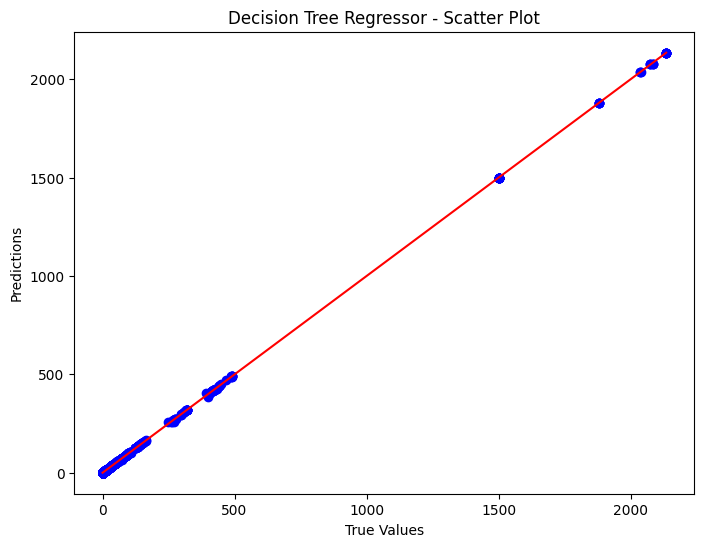

In [29]:
plt.figure(figsize=(8, 6)) 
plt.scatter(y_test, dt_predictions, color= "blue") 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color= "red") 
plt.xlabel("True Values") 
plt.ylabel("Predictions") 
plt.title("Decision Tree Regressor - Scatter Plot") 
plt.show()

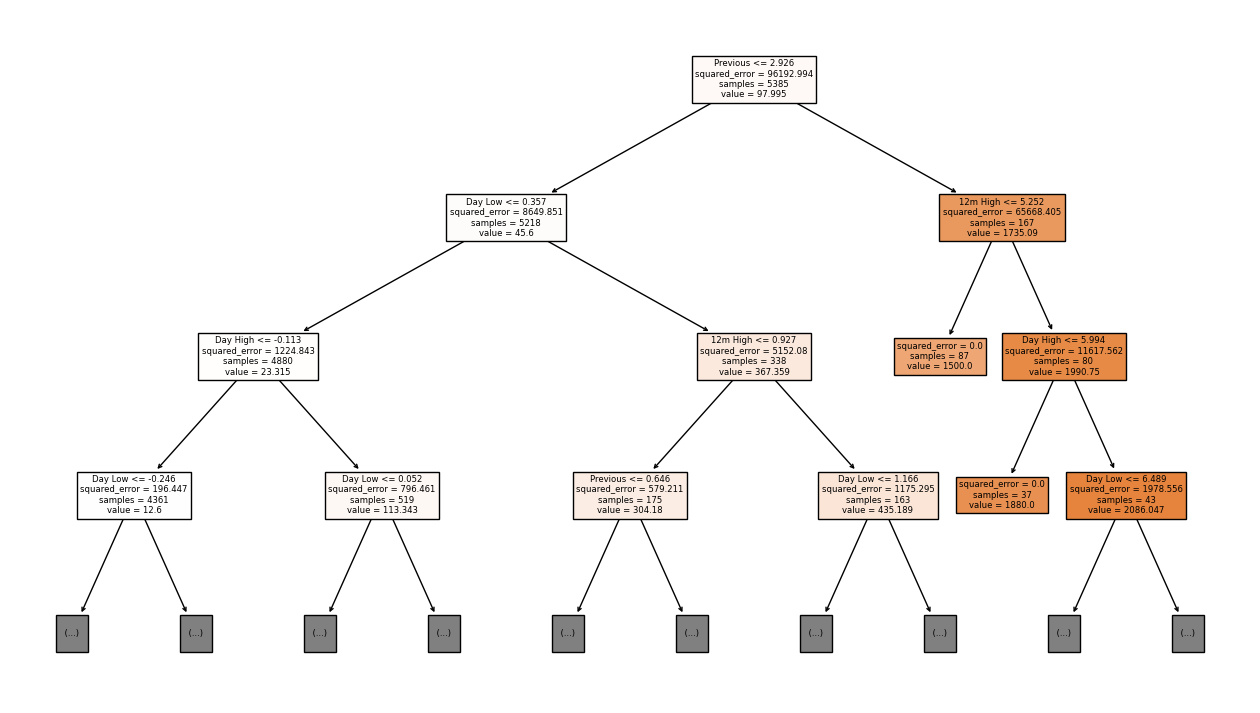

In [30]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 9)) 
plot_tree(dt_regressor, filled=True, max_depth=3, feature_names=X.columns) 
plt.show()

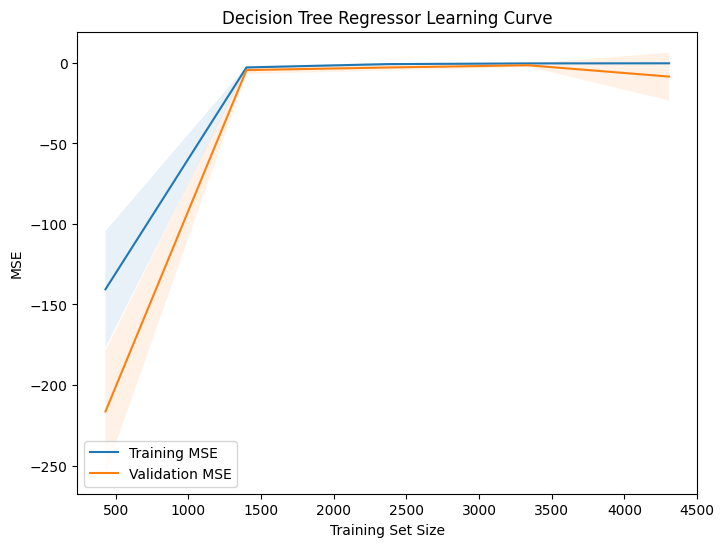

In [31]:
from sklearn.model_selection import learning_curve 
import numpy as np

dt_train_sizes, dt_train_scores, dt_val_scores = learning_curve(dt_regressor, X_train_scaled, y_train, cv=5, scoring= "neg_mean_squared_error") 
dt_train_mean = np.mean(dt_train_scores, axis=1) 
dt_train_std = np.std(dt_train_scores, axis=1) 
dt_val_mean = np.mean(dt_val_scores, axis=1) 
dt_val_std = np.std(dt_val_scores, axis=1)

plt.figure(figsize=(8, 6)) 
plt.plot(dt_train_sizes, dt_train_mean, label= "Training MSE") 
plt.fill_between(dt_train_sizes, dt_train_mean - dt_train_std, dt_train_mean + dt_train_std, alpha=0.1) 
plt.plot(dt_train_sizes, dt_val_mean, label= "Validation MSE") 
plt.fill_between(dt_train_sizes, dt_val_mean - dt_val_std, dt_val_mean + dt_val_std, alpha=0.1) 
plt.xlabel("Training Set Size") 
plt.ylabel("MSE") 
plt.title("Decision Tree Regressor Learning Curve") 
plt.legend() 
plt.show()


# <h3> <font color="#A19104"> Creating a new dataframe for collecting the metric values to compare the models : </font> </h3>

In [32]:
comparision_2 = pd.DataFrame(columns=['Model', 'Mean Squared Error', 'Root Mean Squared Error', 'R-squared', 'Mean Absolute Error'])

In [33]:
comparision_2.loc[0] = ['R_Decision Tree', dt_mse, dt_rmse, dt_r2, dt_mae]

In [34]:
comparision_2

,Model,Mean Squared Error,Root Mean Squared Error,R-squared,Mean Absolute Error
0,R_Decision Tree,1.006206,1.003098,0.999989,0.244214


# <h2> <font color="#A19104">SVC : </font> </h2>

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {
    'C': [0.1, 1, 10],  
    'gamma': [0.1, 0.01, 0.001],  
    'kernel': ['linear', 'rbf']  
}

grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Best Score: 0.999998796554808


In [36]:
from sklearn.svm import SVR

svm_regressor = SVR(C=10,gamma=0.1,kernel='linear')

svm_regressor.fit(X_train_scaled, y_train)

svm_predictions = svm_regressor.predict(X_test_scaled)

# <h3> <font color="#A19104">Evaluation metrics of Support Vector Machines : </font> </h3>

In [37]:
print("Support Vector Machines:")
svm_mse = mean_squared_error(y_test, svm_predictions) 
svm_rmse = np.sqrt(svm_mse) 
svm_r2 = r2_score(y_test, svm_predictions)
svm_mae =  mean_absolute_error(y_test, svm_predictions)

print("\nMean Squared Error:", svm_mse) 
print("\nRoot Mean Squared Error:", svm_rmse) 
print("\nR-squared:", svm_r2)
print("\nMean Absolute Error", svm_mae)

Support Vector Machines:

Mean Squared Error: 0.08930277814323549

Root Mean Squared Error: 0.2988357042644595

R-squared: 0.9999990572735438

Mean Absolute Error 0.0913916522549247


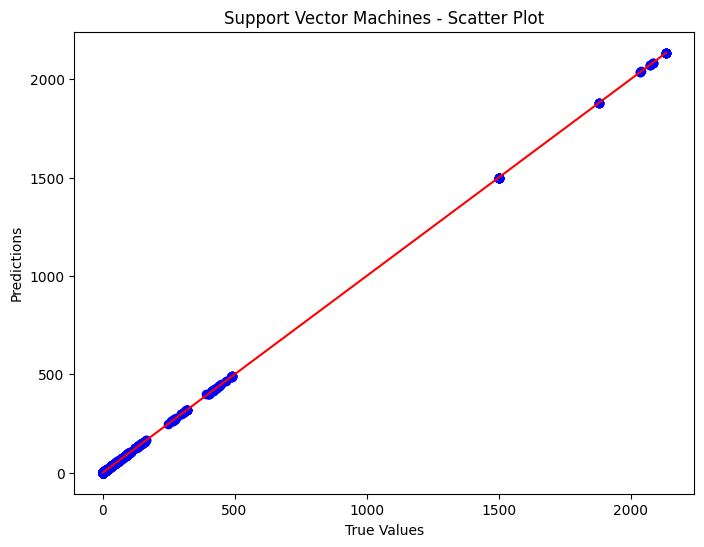

In [38]:
plt.figure(figsize=(8, 6)) 
plt.scatter(y_test, svm_predictions, color= "blue") 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color= "red") 
plt.xlabel("True Values") 
plt.ylabel("Predictions") 
plt.title("Support Vector Machines - Scatter Plot") 
plt.show()

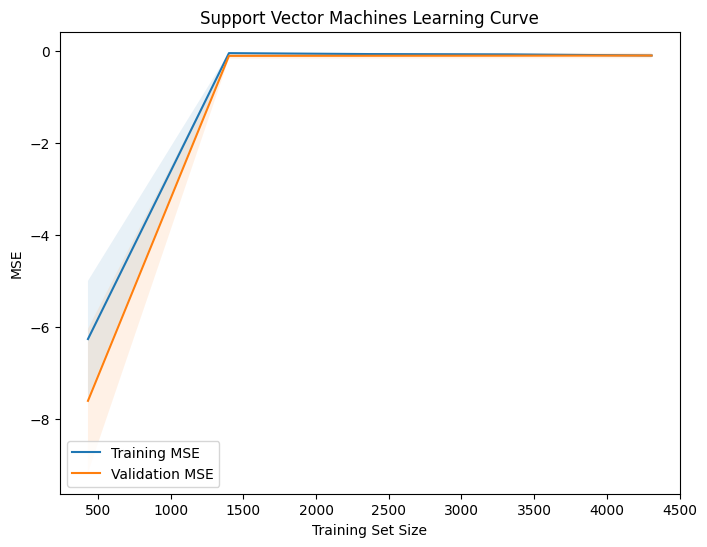

In [39]:
from sklearn.model_selection import learning_curve 
import numpy as np

dt_train_sizes, dt_train_scores, dt_val_scores = learning_curve(svm_regressor, X_train_scaled, y_train, cv=5, scoring= "neg_mean_squared_error") 
dt_train_mean = np.mean(dt_train_scores, axis=1) 
dt_train_std = np.std(dt_train_scores, axis=1) 
dt_val_mean = np.mean(dt_val_scores, axis=1) 
dt_val_std = np.std(dt_val_scores, axis=1)

plt.figure(figsize=(8, 6)) 
plt.plot(dt_train_sizes, dt_train_mean, label= "Training MSE") 
plt.fill_between(dt_train_sizes, dt_train_mean - dt_train_std, dt_train_mean + dt_train_std, alpha=0.1) 
plt.plot(dt_train_sizes, dt_val_mean, label= "Validation MSE") 
plt.fill_between(dt_train_sizes, dt_val_mean - dt_val_std, dt_val_mean + dt_val_std, alpha=0.1) 
plt.xlabel("Training Set Size") 
plt.ylabel("MSE") 
plt.title("Support Vector Machines Learning Curve") 
plt.legend() 
plt.show()


In [40]:
comparision_2.loc[1] = ['R_SVM', svm_mse, svm_rmse, svm_r2, svm_mae]

In [41]:
comparision_2

,Model,Mean Squared Error,Root Mean Squared Error,R-squared,Mean Absolute Error
0,R_Decision Tree,1.006206,1.003098,0.999989,0.244214
1,R_SVM,0.089303,0.298836,0.999999,0.091392


# <h2> <font color="#A19104">Random Forest Regressor : </font> </h2>

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=20000, min_samples_leaf=3, min_samples_split=11)

rf_regressor.fit(X_train_scaled, y_train)

rf_predictions = rf_regressor.predict(X_test_scaled)

# <h3> <font color="#A19104">Evaluation metrics of Random Forest Regressor : </font> </h3>

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

rf_mse = mean_squared_error(y_test, rf_predictions) 
rf_rmse = np.sqrt(rf_mse) 
rf_r2 = r2_score(y_test, rf_predictions)
rf_mae =  mean_absolute_error(y_test, rf_predictions)

print("Random Forest Regressor:") 
print("\nMean Squared Error:", rf_mse) 
print("\nRoot Mean Squared Error:", rf_rmse) 
print("\nR-squared:", rf_r2)
print("\nMean Absolute Error", rf_mae)

Random Forest Regressor:

Mean Squared Error: 0.6430786508603121

Root Mean Squared Error: 0.801921848349521

R-squared: 0.9999932113281333

Mean Absolute Error 0.19902174190541538


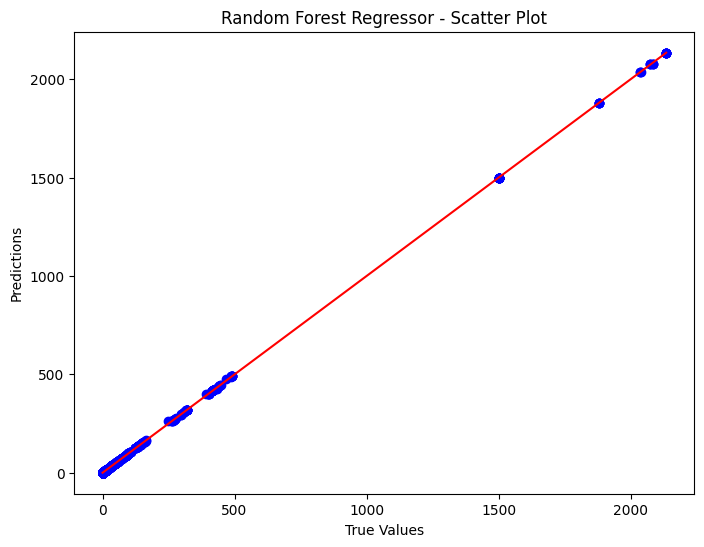

In [54]:
plt.figure(figsize=(8, 6)) 
plt.scatter(y_test, rf_predictions, color= "blue") 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color= "red") 
plt.xlabel("True Values") 
plt.ylabel("Predictions") 
plt.title("Random Forest Regressor - Scatter Plot") 
plt.show()

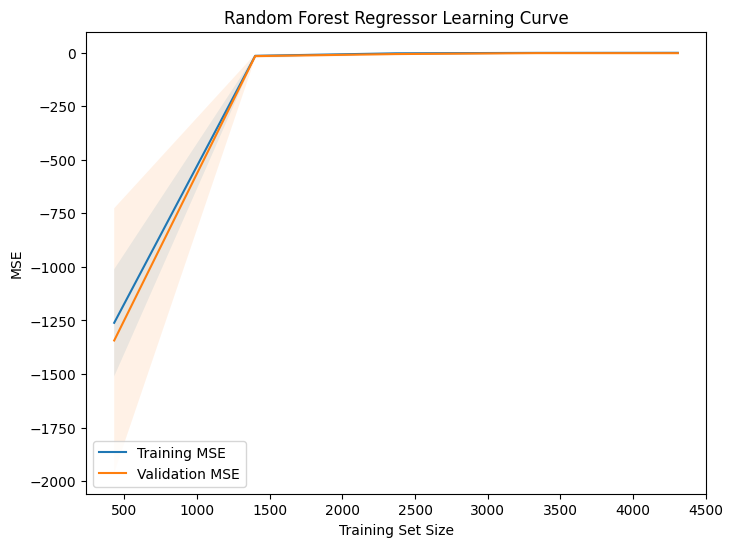

In [45]:
from sklearn.model_selection import learning_curve 
import numpy as np

dt_train_sizes, dt_train_scores, dt_val_scores = learning_curve(rf_regressor, X_train_scaled, y_train, cv=5, scoring= "neg_mean_squared_error") 
dt_train_mean = np.mean(dt_train_scores, axis=1) 
dt_train_std = np.std(dt_train_scores, axis=1) 
dt_val_mean = np.mean(dt_val_scores, axis=1) 
dt_val_std = np.std(dt_val_scores, axis=1)

plt.figure(figsize=(8, 6)) 
plt.plot(dt_train_sizes, dt_train_mean, label= "Training MSE") 
plt.fill_between(dt_train_sizes, dt_train_mean - dt_train_std, dt_train_mean + dt_train_std, alpha=0.1) 
plt.plot(dt_train_sizes, dt_val_mean, label= "Validation MSE") 
plt.fill_between(dt_train_sizes, dt_val_mean - dt_val_std, dt_val_mean + dt_val_std, alpha=0.1) 
plt.xlabel("Training Set Size") 
plt.ylabel("MSE") 
plt.title("Random Forest Regressor Learning Curve") 
plt.legend() 
plt.show()


In [46]:
comparision_2.loc[2] = ['Random Forest Regressor', rf_mse, rf_rmse, rf_r2, rf_mae]

In [47]:
comparision_2

,Model,Mean Squared Error,Root Mean Squared Error,R-squared,Mean Absolute Error
0,R_Decision Tree,1.006206,1.003098,0.999989,0.244214
1,R_SVM,0.089303,0.298836,0.999999,0.091392
2,Random Forest Regressor,0.643079,0.801922,0.999993,0.199022


# <h1> <font color="teal">Comaprision of Models: </font> </h1>

# <h3> <font color="#A19104">using cross-validation scores : </font> </h3>

In [48]:
from sklearn.model_selection import cross_val_score

models = [
    ('Decision Trees', dt_regressor),
    ('SVM', svm_regressor),
    ('Random Forest', rf_regressor)
]

cv_scores = []
for name, model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(scores)

cv_scores_df = pd.DataFrame(cv_scores, columns=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
cv_scores_df['Model'] = [name for name, _ in models]

cv_scores_df['Average'] = cv_scores_df.iloc[:, :-1].mean(axis=1)

print(cv_scores_df)

      Fold 1    Fold 2     Fold 3    Fold 4    Fold 5           Model  \
0 -23.177319 -3.735188 -38.326651 -0.740774 -0.799971  Decision Trees   
1  -0.051643 -0.066367  -0.133695 -0.072321 -0.210005             SVM   
2  -6.168122 -1.001310  -5.290260 -0.597171 -0.597734   Random Forest   

     Average  
0 -13.355981  
1  -0.106806  
2  -2.730919  


# <h3> <font color="#A19104">Plot box plots of the cross-validation scores : </font> </h3>

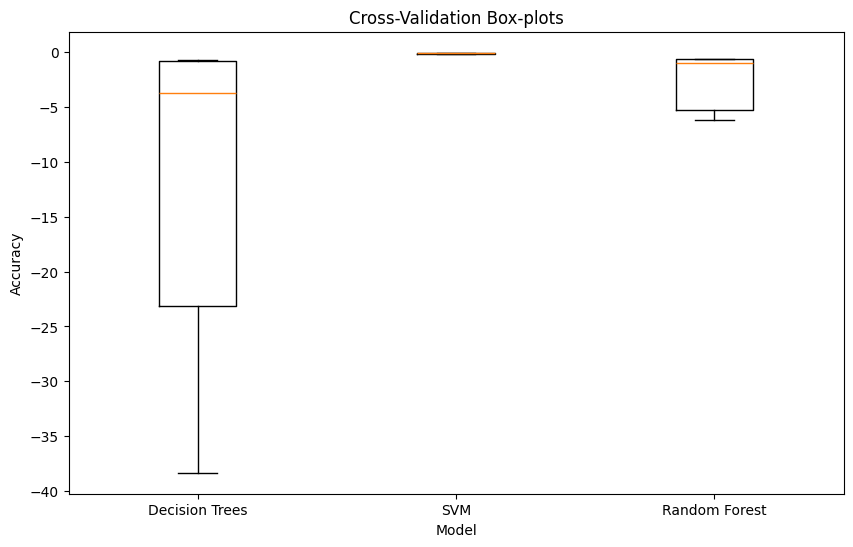

In [49]:
plt.figure(figsize=(10, 6))
plt.boxplot(cv_scores, labels=[name for name, _ in models])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Box-plots')
plt.show()

# <h3> <font color="#A19104">Plotting bar plot to compare the metric values of each model : </font> </h3>

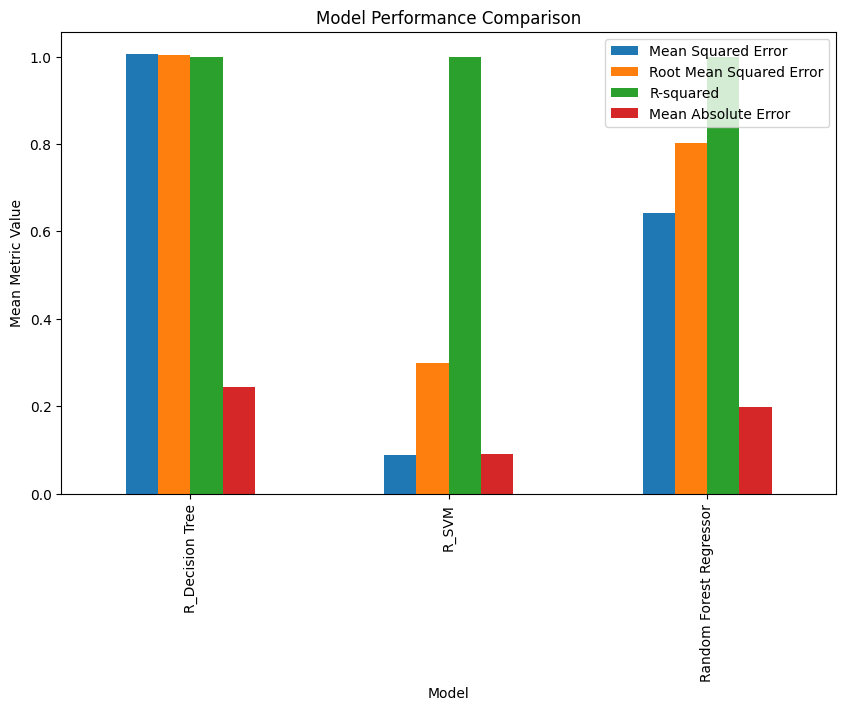

In [50]:
mean_metrics = comparision_2.groupby('Model').mean()

mean_metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Metric Value')
plt.show()

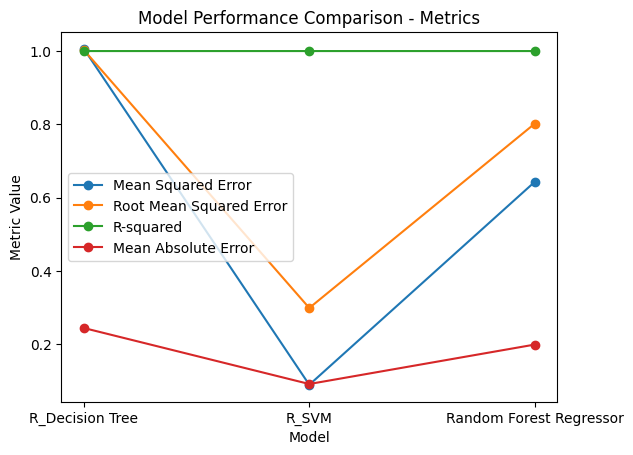

In [51]:
metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'R-squared', 'Mean Absolute Error']
for metric in metric_names:
    plt.plot(mean_metrics.index, mean_metrics[metric], marker='o', label=metric)

plt.title('Model Performance Comparison - Metrics')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

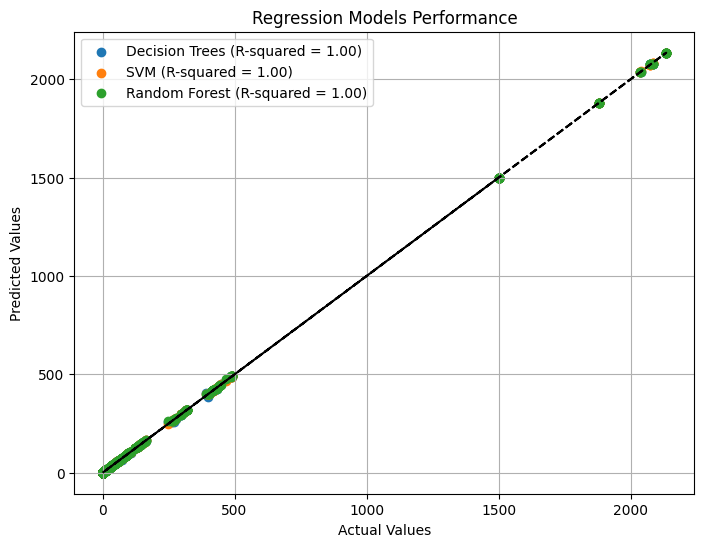

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

#calculate the R-squared score for each model
dt_r2 = r2_score(y_test, dt_predictions)
svm_r2 = r2_score(y_test, svm_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

plt.figure(figsize=(8, 6))

#plot the predicted values vs the actual values for each model
plt.scatter(y_test, dt_predictions, label='Decision Trees (R-squared = {:.2f})'.format(dt_r2))
plt.scatter(y_test, svm_predictions, label='SVM (R-squared = {:.2f})'.format(svm_r2))
plt.scatter(y_test, rf_predictions, label='Random Forest (R-squared = {:.2f})'.format(rf_r2))
#plt.scatter(y_test, knn_pred, label='KNN (R-squared = {:.2f})'.format(knn_r2))

#plot the identity line
plt.plot(y_test, y_test, color='black', linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Models Performance')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()